In [47]:
import numpy as np
import pandas as pd

import dabl

import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
import warnings
warnings.filterwarnings("ignore")

## Reading the data

In [49]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [50]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
print(df.shape)
print(df.columns)
print(df.isna().sum().sum())

(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
0


# Overview of the data

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [53]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [54]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('__________________')

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
__________________
gender
Male      3555
Female    3488
Name: count, dtype: int64
__________________
Partner
No     3641
Yes    3402
Name: count, dtype: int64
__________________
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
__________________
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
__________________
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
__________________
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
__________________
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
__________________
OnlineBackup
No                   

In [67]:
# df.describe()

In [56]:
df.tenure.value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [57]:
df[df.TotalCharges == ' '].head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No


### Blank found in total charges, hence it is corrected using Monthly charges and tenure

In [58]:
df['TotalCharges'] = np.where(df['TotalCharges']== ' ', df['MonthlyCharges'] * df['tenure'], df['TotalCharges'])
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [59]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

In [68]:
# df.info()

# EDA

### First look of EDA using DABL 

Detected feature types:
continuous                   3
dirty_float                  0
low_card_int_ordinal         0
low_card_int_categorical     0
categorical                 17
date                         0
free_string                  1
useless                      0
dtype: int64
Target looks like classification
Linear Discriminant Analysis training set score: 0.681


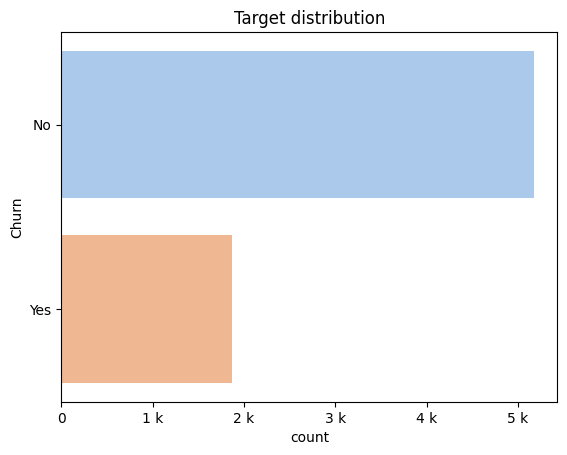

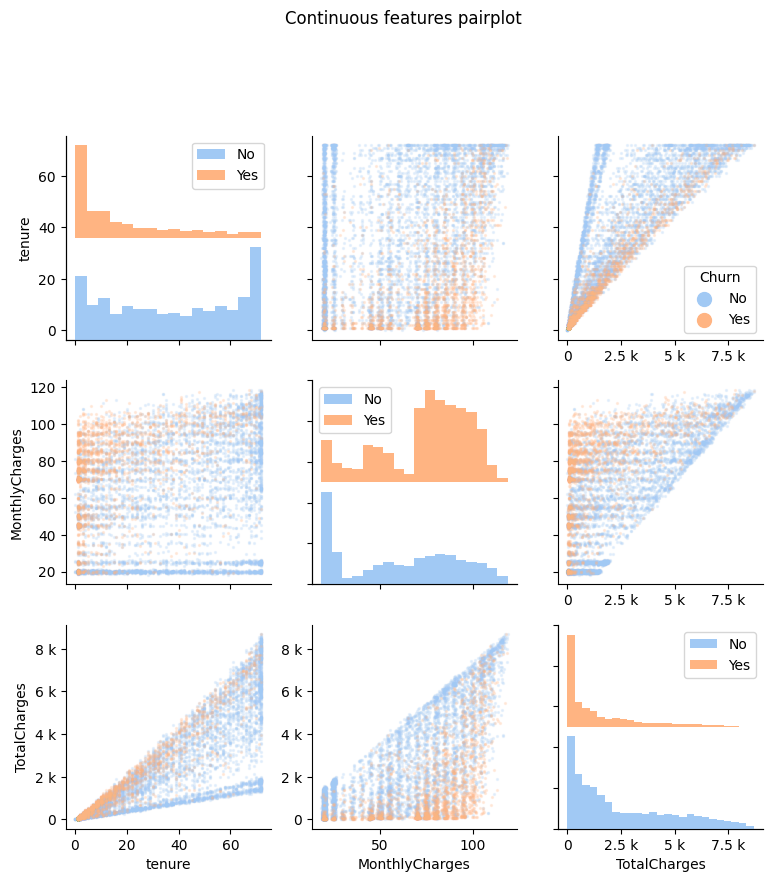

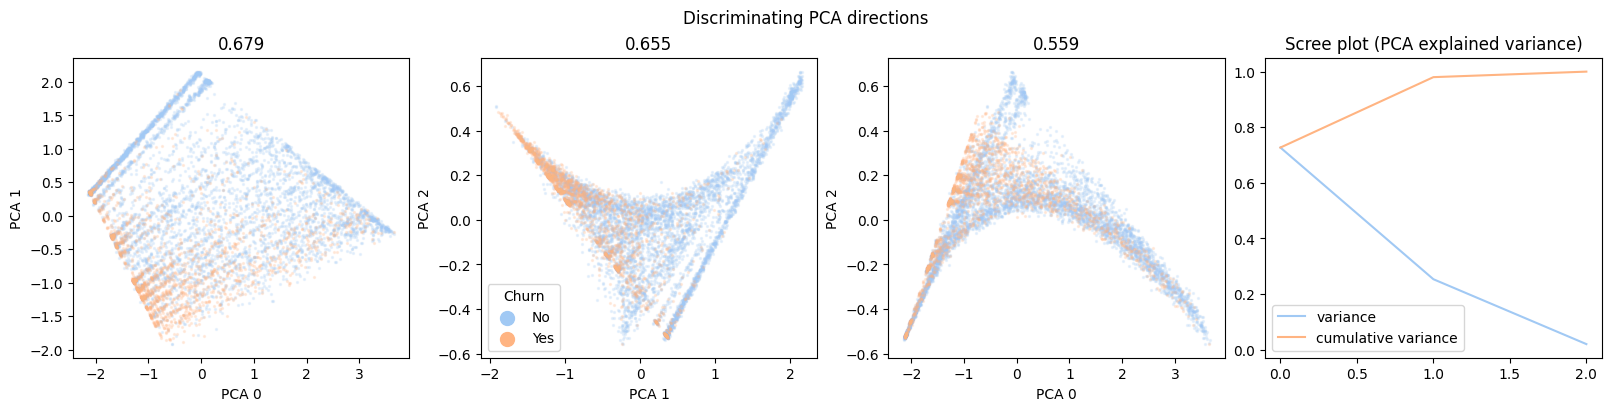

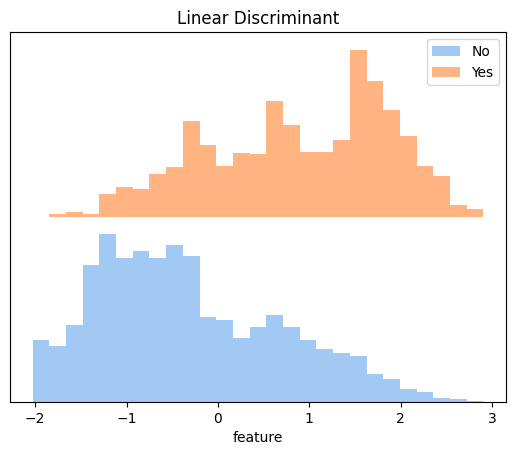

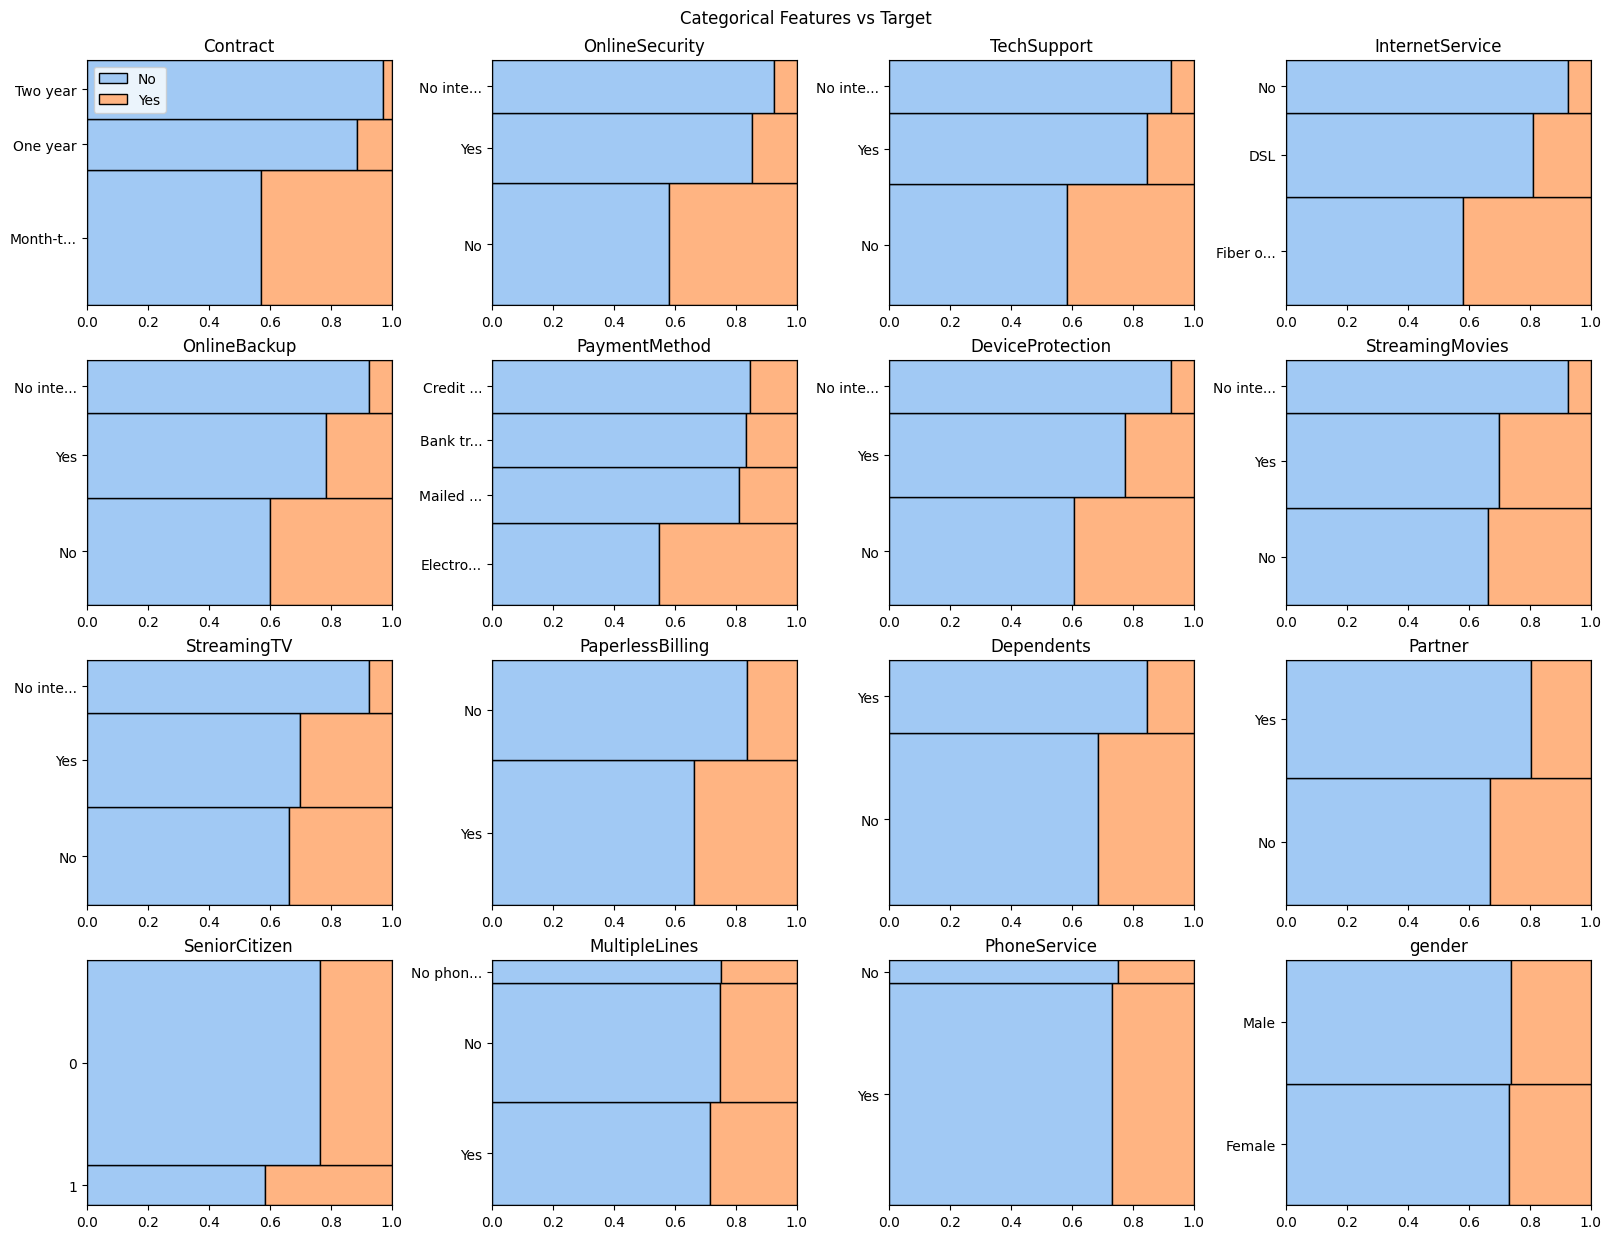

In [61]:
# Use DABL's data cleaning and auto-EDA
dabl.clean(df, verbose=1)

# Auto-EDA using DABL
dabl.plot(df, target_col='Churn')

# Show the plots
import matplotlib.pyplot as plt
plt.show()

In [62]:
# for col in df.columns:
#     if pd.api.types.is_numeric_dtype(df[col]):
#         # For numeric columns, create a distribution plot with KDE
#         sns.distplot(df[col], kde=True)
#         plt.title(f'Distribution of {col}')
#         plt.show()
#     elif pd.api.types.is_object_dtype(df[col]):
#         # For categorical columns, create a count plot
#         sns.countplot(data=df, x=col)
#         plt.title(f'Count of {col}')
#         plt.xticks(rotation=45)
#         plt.show()

In [63]:
num = []
cat =[]
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        num.append(col)
    elif pd.api.types.is_object_dtype(df[col]):
        cat.append(col)
        
print('Numerical Columns:',num)
print('Categorical Columns:',cat)

Numerical Columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


### Numerical Columns

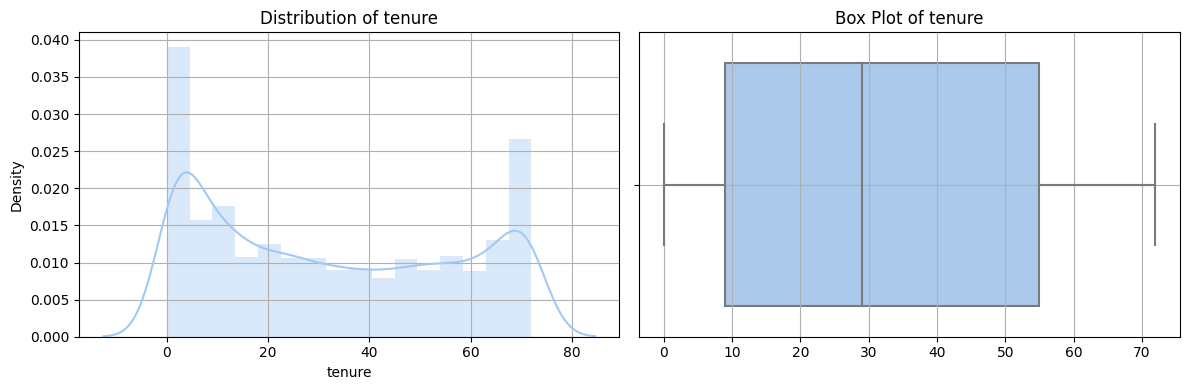

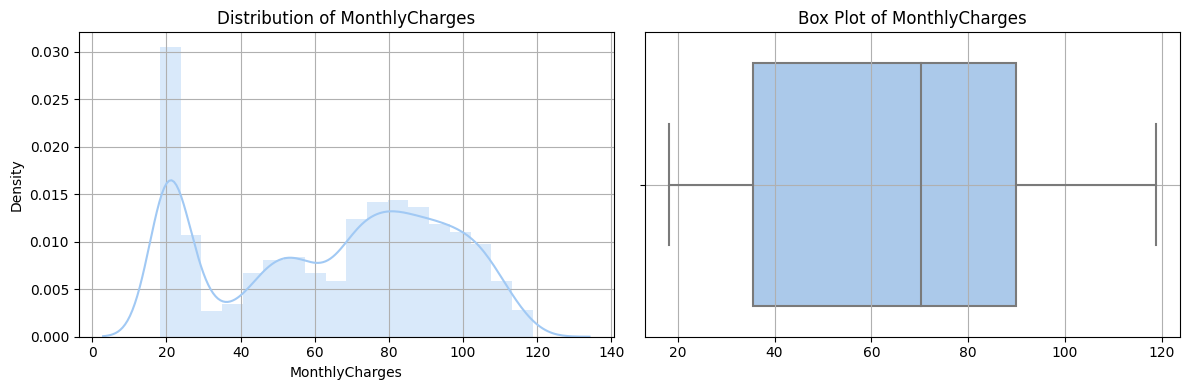

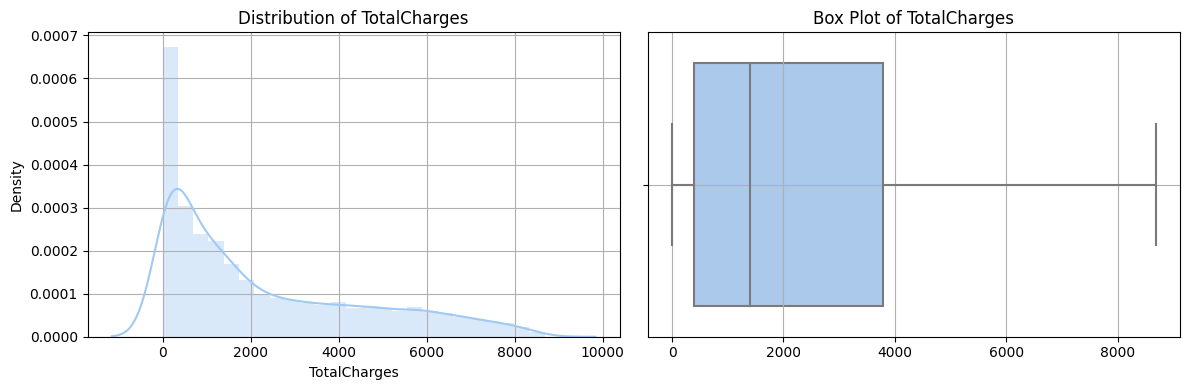

In [64]:
for i in num:
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Plot the KDE plot
    sns.distplot(df[i], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {i}')
    axes[0].grid(True)
    axes[1].set_xlabel('')
    

    # Plot the horizontal box plot
    sns.boxplot(x=df[i], ax=axes[1])
    axes[1].set_title(f'Box Plot of {i}')
    axes[1].grid(True)
    axes[1].set_xlabel('')
    

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

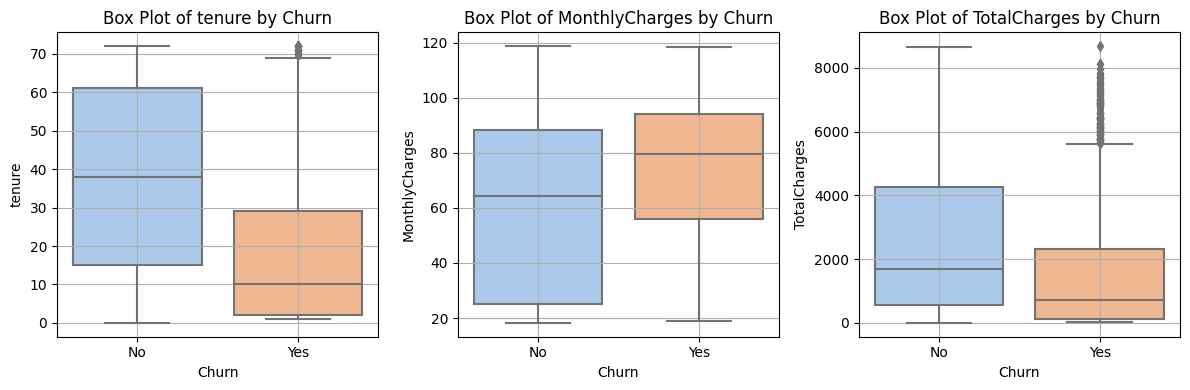

In [65]:
numerical_columns = [col for col in df.columns if df[col].dtype != 'object']
churn_column = 'Churn'

fig, axes = plt.subplots(1, len(numerical_columns), figsize=(12, 4))
fig.subplots_adjust(wspace=0.5)

for i, column in enumerate(numerical_columns):
    ax = axes[i]
    sns.boxplot(x=df[churn_column], y=df[column], ax=ax)
    ax.set_title(f'Box Plot of {column} by {churn_column}')
    ax.set_xlabel(churn_column)
    ax.set_ylabel(column)
    ax.grid(True)

plt.tight_layout()
plt.show()



### Insights
> Higher the tenure, lesser the tendency to churn

> Higher the Montly Charges, higher the tendency to churn

> Customers who pay higher Monthly charges tend to churn faster, however customers who paid more in total charges churn lesser than those who paid less Total charges. However we can see some outliers

In [66]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming you have your data in a pandas DataFrame called 'df'

# Drop any missing values
df.dropna(inplace=True)

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create an empty DataFrame to store the ANOVA test results
anova_results = pd.DataFrame(columns=['Column', 'F-statistic', 'P-value'])

# Perform ANOVA test for each numerical column
for column in numerical_columns:
    churned = df[df['Churn'] == 'Yes'][column]
    not_churned = df[df['Churn'] == 'No'][column]

    f_statistic, p_value = f_oneway(churned, not_churned)

    # Store the ANOVA test results in a temporary DataFrame
    temp_df = pd.DataFrame({'Column': [column], 'F-statistic': [f_statistic], 'P-value': [p_value]})

    # Concatenate the temporary DataFrame with the anova_results DataFrame
    anova_results = pd.concat([anova_results, temp_df], ignore_index=True)

# Display the ANOVA test results
anova_results


,Column,F-statistic,P-value
0,tenure,997.268010,7.999058e-205
1,MonthlyCharges,273.463704,2.706646e-60
2,TotalCharges,288.278961,2.127212e-63


'tenure': Length of tenure significantly influences churn (F=997.27, p<0.001).

'MonthlyCharges': Monthly charges have a significant impact on churn (F=273.46, p<0.001).

'TotalCharges': Total charges show a strong association with churn (F=288.28, p<0.001).

## Categorical Columns

In [19]:
for i in cat:
    print((i, df[i].nunique()), end = ' ')

('customerID', 7043) ('gender', 2) ('SeniorCitizen', 2) ('Partner', 2) ('Dependents', 2) ('PhoneService', 2) ('MultipleLines', 3) ('InternetService', 3) ('OnlineSecurity', 3) ('OnlineBackup', 3) ('DeviceProtection', 3) ('TechSupport', 3) ('StreamingTV', 3) ('StreamingMovies', 3) ('Contract', 3) ('PaperlessBilling', 2) ('PaymentMethod', 4) ('Churn', 2) 

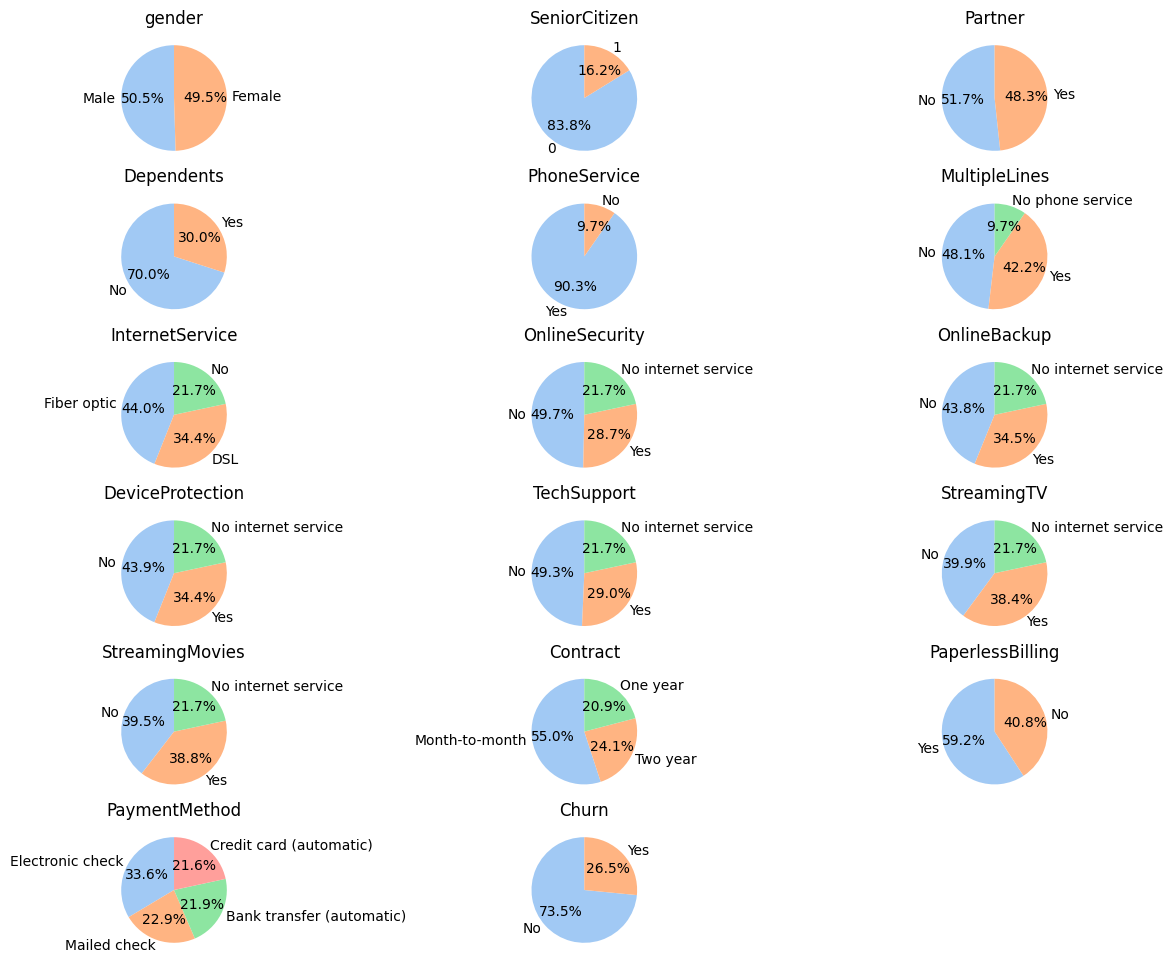

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
categorical_columns = df.columns[df.dtypes == 'object'].drop('customerID')

sns.set_palette('pastel')  # Set color palette

num_plots = len(categorical_columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.subplots_adjust(hspace=0.2)

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    counts = df[column].value_counts()
    ax.c vcounts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(column)

# In case the number of subplots is not a perfect square, remove empty subplots
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.show()


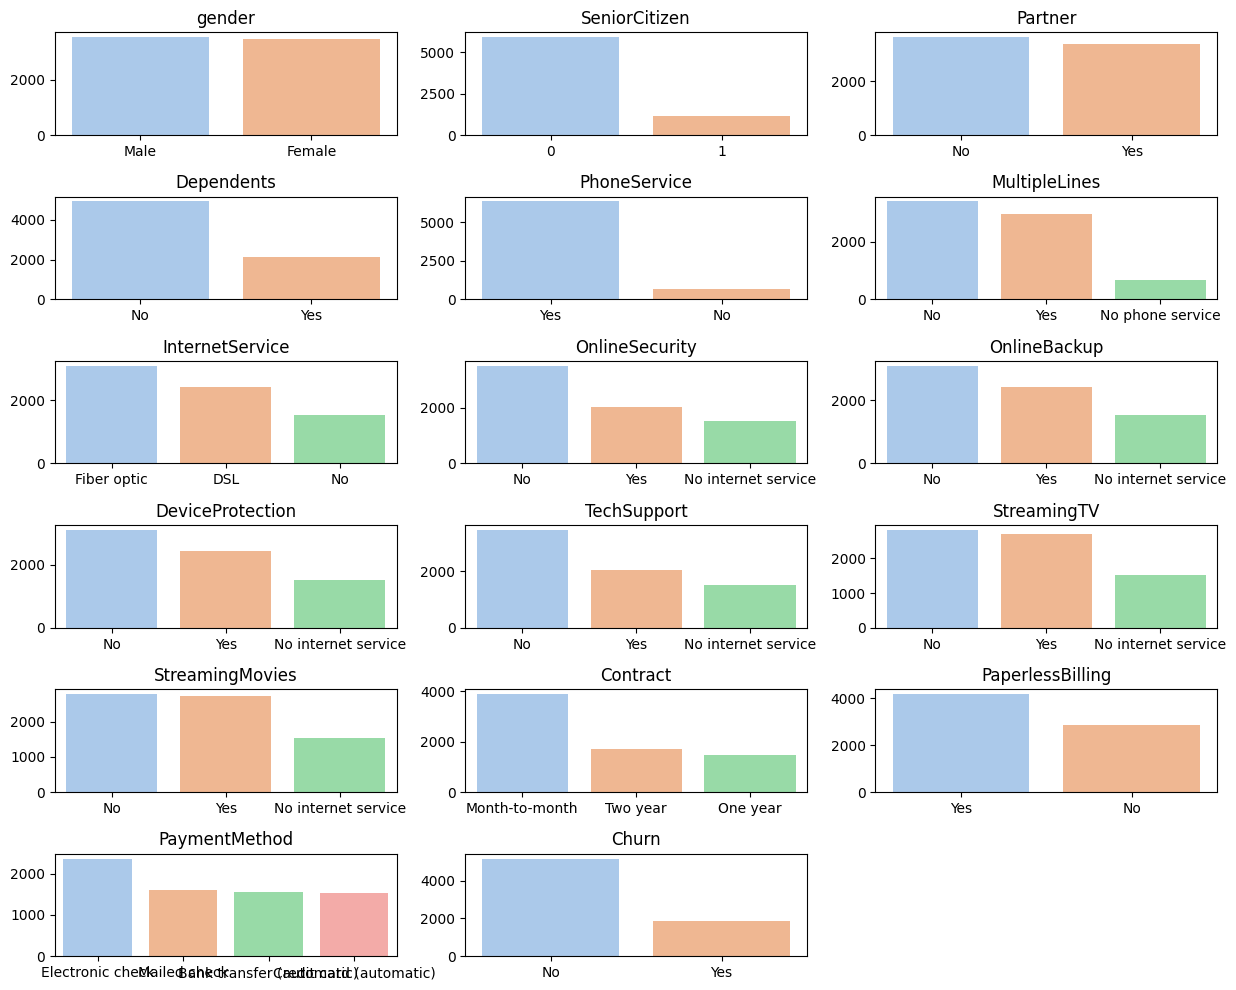

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'df'
categorical_columns = df.columns[df.dtypes == 'object'].drop('customerID')

num_plots = len(categorical_columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.subplots_adjust(hspace=0.6)

sns.set_palette('pastel')  # Set color palette

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    counts = df[column].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=ax)
    ax.set_xlabel('')
    ax.set_title(column)

# In case the number of subplots is not a perfect square, remove empty subplots
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.show()


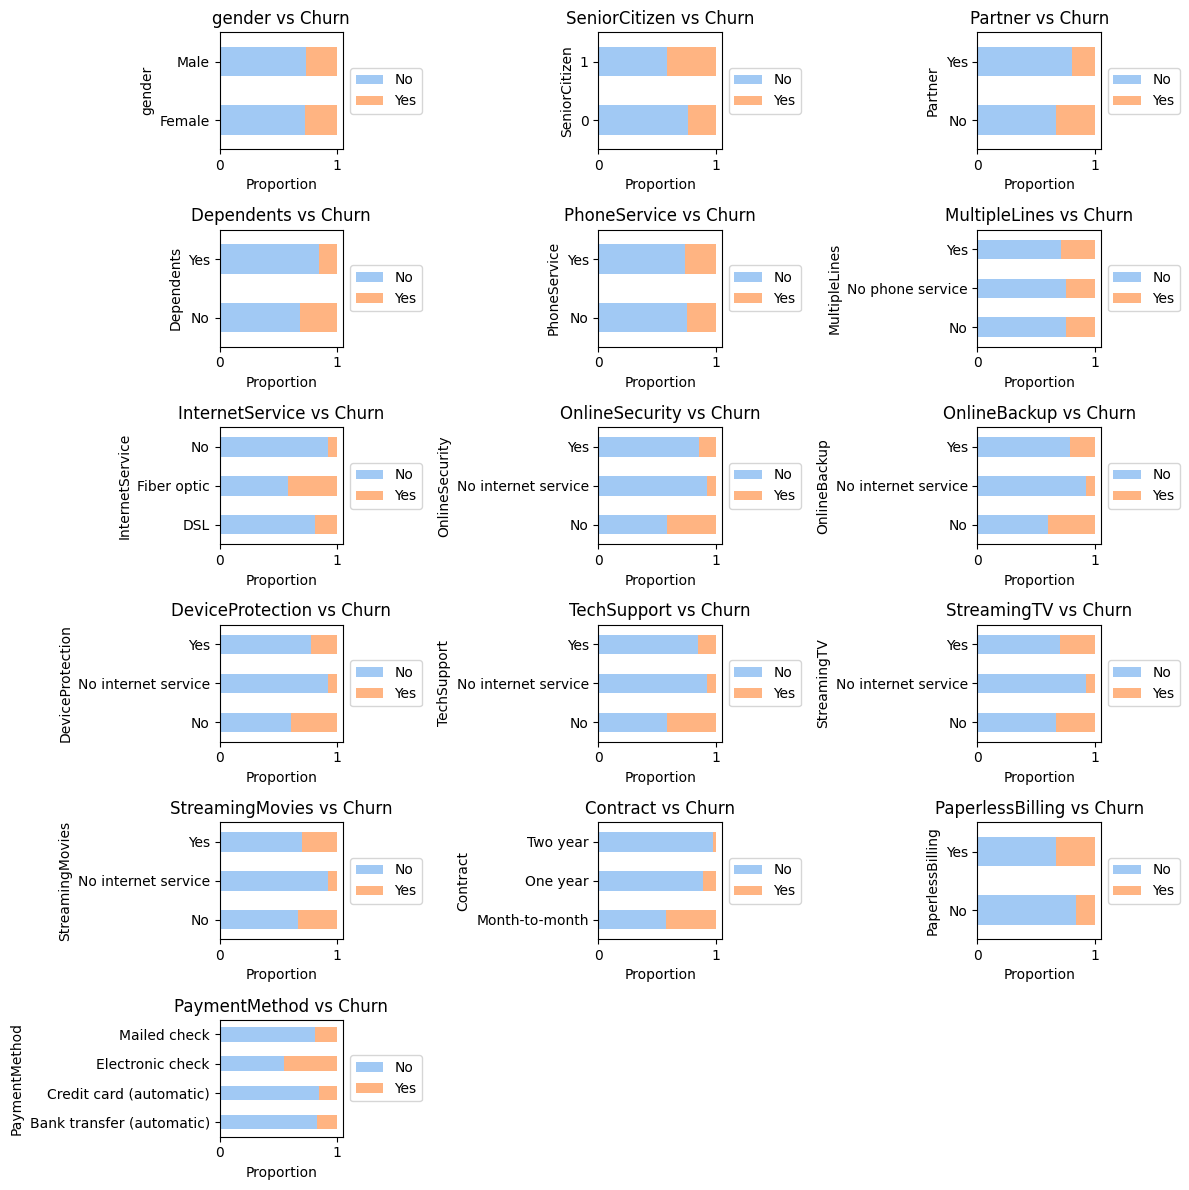

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'df'
categorical_columns = df.columns[df.dtypes == 'object'].drop(['customerID', 'Churn'])

num_plots = len(categorical_columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
fig.subplots_adjust(hspace=0.6)

sns.set_palette('pastel')  # Set color palette

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    # Create a cross-tabulation between 'Churn' and the current column
    crosstab = pd.crosstab(df[column], df['Churn'])
    
    # Normalize the values to represent proportions
    crosstab = crosstab.div(crosstab.sum(axis=1), axis=0)
    
    # Plot the normalized values as horizontal stacked bar plots
    crosstab.plot(kind='barh', stacked=True, ax=ax)
    
    ax.set_title(f"{column} vs Churn")
    ax.set_xlabel('Proportion')
    ax.set_ylabel(column)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Adjust legend position

# Adjust the vertical spacing between subplots
plt.subplots_adjust(top=1)
plt.subplots_adjust(bottom=0.2)

# In case the number of subplots is not a perfect square, remove empty subplots
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [69]:
# categorical_columns = df.columns[df.dtypes == 'object'].drop(['customerID', 'Churn'])
# crosstabs = {}
# for column in categorical_columns:
#     # Create a cross-tabulation between 'Churn' and the current column
#     crosstab = pd.crosstab(df[column], df['Churn'])
#     # Normalize the values to represent proportions
#     crosstab = crosstab.div(crosstab.sum(axis=1), axis=0)
#     crosstabs[column] = crosstab
# crosstabs

## Insights of categorical_columns for ML Modeling

- **Gender vs Churn:**
  - Females have a churn rate of approximately 27% while males have a churn rate of around 26%.
  - Gender does not appear to have a significant impact on the churn rate.

- **SeniorCitizen vs Churn:**
  - Senior citizens (SeniorCitizen=1) have a higher churn rate of about 42% compared to non-senior citizens (SeniorCitizen=0) with a churn rate of approximately 24%.
  - SeniorCitizen status seems to be a significant factor influencing the churn rate.

- **Partner vs Churn:**
  - Customers without partners (Partner=No) have a slightly higher churn rate of about 33% compared to customers with partners (Partner=Yes) with a churn rate of around 20%.
  - Having a partner appears to have a positive impact on reducing the churn rate.

- **Dependents vs Churn:**
  - Customers without dependents (Dependents=No) have a higher churn rate of about 31% compared to customers with dependents (Dependents=Yes) with a churn rate of approximately 15%.
  - Having dependents seems to have a positive influence on reducing the churn rate.

- **PhoneService vs Churn:**
  - The churn rate for customers with phone service (PhoneService=Yes) is around 27% while for customers without phone service (PhoneService=No), it is about 25%.
  - Having or not having phone service does not significantly impact the churn rate.

- **MultipleLines vs Churn:**
  - Customers with multiple lines (MultipleLines=Yes) have a slightly higher churn rate of about 29% compared to customers with no multiple lines (MultipleLines=No or No phone service) with a churn rate of around 25%.
  - MultipleLines feature does not strongly influence the churn rate.

- **InternetService vs Churn:**
  - Customers with fiber optic internet service (InternetService=Fiber optic) have a significantly higher churn rate of about 42% compared to customers with DSL (churn rate around 19%) or no internet service (churn rate around 7%).
  - Fiber optic internet service appears to be a significant factor contributing to higher churn rates.

- **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies vs Churn:**
  - Customers without these additional services (No or No internet service) generally have higher churn rates compared to customers with these services.
  - The impact of these services on churn rates varies, but in general, customers without these services tend to churn at higher rates.

- **Contract vs Churn:**
  - Customers with a month-to-month contract have a higher churn rate of about 43%, while customers with one-year and two-year contracts have lower churn rates of approximately 11% and 28% respectively.
  - Contract duration is a significant factor affecting the churn rate, with longer-term contracts showing lower churn rates.

- **PaperlessBilling vs Churn:**
  - Customers with paperless billing (PaperlessBilling=Yes) have a slightly higher churn rate of about 34% compared to customers without paperless billing (PaperlessBilling=No) with a churn rate of around 16%.
  - Paperless billing does have some impact on the churn rate, but the effect is not substantial.

- **PaymentMethod vs Churn:**
  - Customers using payment methods such as Electronic check have a higher churn rate of about 45% compared to other payment methods like Bank transfer (automatic), Credit card (automatic), or Mailed check, which have churn rates ranging from 15% to 19%.
  - Choice of payment method appears to be a significant factor influencing the churn rate.


In [33]:
import pandas as pd
from scipy.stats import chi2_contingency

# Select the variables to test
variables = df.columns[df.dtypes == 'object'].drop(['customerID', 'Churn'])

# Perform chi-square test for each variable
results = []
for variable in variables:
    contingency_table = pd.crosstab(df[variable], df['Churn'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    results.append({'Variable': variable, 'Chi-square': chi2, 'p-value': p_value})

# Create a DataFrame with the test results
results_df = pd.DataFrame(results)

# Display the results
results_df

,Variable,Chi-square,p-value
0,gender,0.484083,4.865787e-01
1,SeniorCitizen,159.426300,1.510067e-36
2,Partner,158.733382,2.139911e-36
3,Dependents,189.129249,4.924922e-43
4,PhoneService,0.915033,3.387825e-01
5,MultipleLines,11.330441,3.464383e-03
6,InternetService,732.309590,9.571788e-160
7,OnlineSecurity,849.998968,2.661150e-185
8,OnlineBackup,601.812790,2.079759e-131
9,DeviceProtection,558.419369,5.505219e-122


1. 'gender': Gender does not appear to have a significant association with churn.

2. 'SeniorCitizen': Senior citizens are more likely to churn compared to non-senior citizens.

3. 'Partner': Customers with partners are less likely to churn than those without partners.

4. 'Dependents': Customers with dependents are less likely to churn than those without dependents.

5. 'PhoneService': Having phone service does not strongly influence churn.

6. 'MultipleLines': Customers with multiple lines may have a slightly higher likelihood of churn.

7. 'InternetService': The type of internet service has a strong impact on churn.

8. 'OnlineSecurity': Customers without online security are more likely to churn.

9. 'OnlineBackup': Customers without online backup are more likely to churn.

10. 'DeviceProtection': Customers without device protection are more likely to churn.

11. 'TechSupport': Customers without tech support are more likely to churn.

12. 'StreamingTV': Streaming TV services may have a slight impact on churn.

13. 'StreamingMovies': Streaming movie services may have a slight impact on churn.

14. 'Contract': The contract type significantly affects churn, with shorter-term contracts associated with higher churn.

15. 'PaperlessBilling': Customers with paperless billing have a higher likelihood of churn.

16. 'PaymentMethod': The choice of payment method has a notable influence on churn.


Gender: No significant association with the outcome.

SeniorCitizen: Strong association with the outcome.

Partner: Strong association with the outcome.

Dependents: Strong association with the outcome.

PhoneService: No significant association with the outcome.

MultipleLines: Significant association with the outcome.

InternetService: Highly significant association with the outcome.

OnlineSecurity: Strong association with the outcome.

OnlineBackup: Significant association with the outcome.

DeviceProtection: Strong association with the outcome.

TechSupport: Strong association with the outcome.

StreamingTV: Significant association with the outcome.

StreamingMovies: Significant association with the outcome.

Contract: Highly significant association with the outcome.

PaperlessBilling: Significant association with the outcome.

PaymentMethod: Highly significant association with the outcome.

## Data Preprocessing

In [25]:
# Calculate the correlation between 'column1' and 'column2'
correlation = df['tenure'].corr(df['MonthlyCharges'])

# Print the correlation coefficient
print(f"Correlation: {correlation}")

Correlation: 0.24789985628615008


In [26]:
# Calculate the correlation between 'column1' and 'column2'
correlation = df['tenure'].corr(df['TotalCharges'])

# Print the correlation coefficient
print(f"Correlation: {correlation}")

Correlation: 0.826178397950242
